In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import os
import io
import pdb
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
import pyswarms as ps
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

In [7]:
#Machine learning models
vectorizer=CountVectorizer(stop_words='english',lowercase=True)

MNBC=MultinomialNB(alpha=0.5743650,class_prior=None,fit_prior=False)    #Multinomial Naive BAYES
SGDC=SGDClassifier(loss="log_loss", alpha=0.0001, max_iter=1000, tol=1e-3, epsilon=0.1)   #Stochastic Gradient Descent
DTC=DecisionTreeClassifier(criterion = "entropy", splitter = "best")  #entropy can also be used  #Decision Tree
RFC=RandomForestClassifier(criterion = "entropy")  #entropy must be used after gini    #Random Forest
MLPC=MLPClassifier(hidden_layer_sizes=5,max_iter=10000,solver='lbfgs')  #Multi-layer Perceptron
ABC=AdaBoostClassifier(n_estimators=100)          #AdaBoost Classifier
GBC=GradientBoostingClassifier(n_estimators=100)        #GradientBoosting Classifier

#Voting Ensemble Technique
VCH=VotingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)],voting='hard')
VCS=VotingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)],voting='soft')

##Bagging Ensemble Technique
BMNBC=BaggingClassifier(MNBC)
BSGDC=BaggingClassifier(SGDC)
BDTC=BaggingClassifier(DTC)
BRFC=BaggingClassifier(RFC)
BMLPC=BaggingClassifier(MLPC)
BGBC=BaggingClassifier(GBC)
BABC=BaggingClassifier(ABC)

#Stacking Ensemble Technique
SCMNBC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=MNBC)
SCSGDC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=SGDC)
SCDTC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=DTC)
SCRFC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=RFC)
SCMLPC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=MLPC)
SCGBC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=GBC)
SCABC=StackingClassifier([('MNBC',MNBC),('SGDC',SGDC),('DTC',DTC),('RFC',RFC),('MLPC',MLPC),('ABC',ABC),('GBC',GBC)], final_estimator=ABC)

skf=StratifiedKFold(n_splits=4,shuffle=True)
models=[MNBC,SGDC,DTC,RFC,MLPC]
split_list=[5,4,3,2]

In [8]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root, filename)
            lines=[]
            f=io.open(path, 'r', encoding='latin1')
            for line in f:
                lines.append(line)
            f.close
            message='\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows=[]
    index=[]
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
    return pd.DataFrame(rows, index=index)

data=pd.DataFrame({'message':[], 'class':[]})

data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Spam','Spam'))
data=data.append(dataFrameFromDirectory('D:/Major Project/App_Data_Set/Spam_Assassin_Dataset/Ham','Ham'))
X=data['message']
y=data['class']


'''Pre-processing'''
IDF = TfidfVectorizer().fit_transform(X)
Tr_tokens=vectorizer.fit_transform(X)



MNBC_accu_stratified=list()
SGDC_accu_stratified=list()
DTC_accu_stratified=list()
RFC_accu_stratified=list()
MPLC_accu_stratified=list()
scores=np.array

In [9]:
#Applying Stratified K_fold_Cross_Validation
def SKF_Split(x):
    skf=StratifiedKFold(n_splits=x,shuffle=True)
    #Stratified K_Fold_spliting
    for train_index, test_index in skf.split(Tr_tokens,y):
        global X_train, X_test, y_train, y_test
        X_train, X_test = Tr_tokens[train_index], Tr_tokens[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

In [10]:
def Stacking_MNBC_Classification():
    print('Stacking is being applied for MNBC Classifier, Training and testing arerunning')
    SCMNBC.fit(X_train, y_train)
    pred=SCMNBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCMNBC.score(X_train,y_train)*100, SCMNBC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [11]:
def Stacking_SGDC_Classification():
    print('Stacking is being applied for SGDC Classifier, Training and testing arerunning')
    SCSGDC.fit(X_train, y_train)
    pred=SCSGDC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCSGDC.score(X_train,y_train)*100, SCSGDC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [12]:
def Stacking_DTC_Classification():
    print('Stacking is being applied for DTC Classifier, Training and testing arerunning')
    SCDTC.fit(X_train, y_train)
    pred=SCDTC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCDTC.score(X_train,y_train)*100, SCDTC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [13]:
def Stacking_RFC_Classification():
    print('Stacking is being applied for RFC Classifier, Training and testing arerunning')
    SCRFC.fit(X_train, y_train)
    pred=SCRFC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCRFC.score(X_train,y_train)*100, SCRFC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [14]:
def Stacking_MLPC_Classification():
    print('Stacking is being applied for MLPC Classifier, Training and testing arerunning')
    SKF_Split(4)
    SCMLPC.fit(X_train, y_train)
    pred=SCMLPC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCMLPC.score(X_train,y_train)*100, SCMLPC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [15]:
def Stacking_GBC_Classification():
    print('Stacking is being applied for GBC Classifier, Training and testing arerunning')
    SCGBC.fit(X_train, y_train)
    pred=SCGBC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCGBC.score(X_train,y_train)*100, SCGBC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

In [16]:
def Stacking_ABC_Classification():
    print('Stacking is being applied for ABC Classifier, Training and testing arerunning')
    SCABC.fit(X_train, y_train)
    pred=SCABC.predict(X_test)
    Training_Accuracy, Testing_Accuracy = SCABC.score(X_train,y_train)*100, SCABC.score(X_test,y_test)*100
    return Testing_Accuracy, (metrics.precision_score(y_test,pred,pos_label='Spam')*100), (metrics.recall_score(y_test,pred,pos_label='Spam')*100), (metrics.f1_score(y_test, pred, pos_label='Spam')*100)

Stacking is being applied for MNBC Classifier, Training and testing arerunning
Stacking is being applied for SGDC Classifier, Training and testing arerunning
Stacking is being applied for DTC Classifier, Training and testing arerunning
Stacking is being applied for RFC Classifier, Training and testing arerunning
Stacking is being applied for MLPC Classifier, Training and testing arerunning
Stacking is being applied for GBC Classifier, Training and testing arerunning
Stacking is being applied for ABC Classifier, Training and testing arerunning


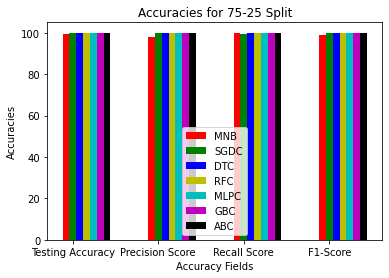

,Classifier,Testing Accuracy,Precision Score,Recall Score,F1-Score
0,Stochastic Gradient Descent,99.814092,99.741435,99.612653,99.677003
1,Multinomial Naive BAYES,99.405094,97.975965,100.000000,98.977636
2,Random Forest,99.869864,99.677835,99.870884,99.774266
3,Decision Tree,99.925637,99.742434,100.000000,99.871051
4,Multi-later Perceptron,99.944228,99.806701,100.000000,99.903257
5,Gradient Boost Classifier,99.907046,100.000000,99.677211,99.838345
6,Adaboost Classifier,99.888455,99.806327,99.806327,99.806327


In [18]:
def Main_Stacking():
    SCMNBC_ACC_LST=list()
    SCSGDC_ACC_LST=list()
    SCDTC_ACC_LST=list()
    SCRFC_ACC_LST=list()
    SCMLPC_ACC_LST=list()
    SCGBC_ACC_LST=list()
    SCABC_ACC_LST=list()
    
    SKF_Split(4)
    acc1=Stacking_MNBC_Classification()
    acc2=Stacking_SGDC_Classification()
    acc3=Stacking_DTC_Classification()
    acc4=Stacking_RFC_Classification()
    acc5=Stacking_MLPC_Classification()
    acc6=Stacking_GBC_Classification()
    acc7=Stacking_ABC_Classification()
    Accuracy_Table=[('Stochastic Gradient Descent',acc2[0],acc2[1],acc2[2],acc2[3]),
            ('Multinomial Naive BAYES',acc1[0],acc1[1],acc1[2],acc1[3]),
            ('Random Forest',acc4[0],acc4[1],acc4[2],acc4[3]),
            ('Decision Tree',acc3[0],acc3[1],acc3[2],acc3[3]),
            ('Multi-later Perceptron',acc5[0],acc5[1],acc5[2],acc5[3]),
            ('Gradient Boost Classifier',acc6[0],acc6[1],acc6[2],acc6[3]),
            ('Adaboost Classifier',acc7[0],acc7[1],acc7[2],acc7[3])
           ]
    Result_table=pd.DataFrame(Accuracy_Table,columns=["Classifier","Testing Accuracy","Precision Score","Recall Score","F1-Score"])
    
    N = 4
    ind = np.arange(N) 
    width = 0.08

    MNB_vals = [acc1[0],acc1[1],acc1[2],acc1[3]]
    bar1 = plt.bar(ind, MNB_vals, width, color = 'r')

    SGDC_vals = [acc2[0],acc2[1],acc2[2],acc2[3]]
    bar2 = plt.bar(ind+width, SGDC_vals, width, color='g')

    DTC_vals = [acc3[0],acc3[1],acc3[2],acc3[3]]
    bar3 = plt.bar(ind+width*2, DTC_vals, width, color = 'b')

    RFC_vals = [acc4[0],acc4[1],acc4[2],acc4[3]]
    bar4 = plt.bar(ind+width*3, RFC_vals, width, color='y')
    
    MLPC_vals = [acc5[0],acc5[1],acc5[2],acc5[3]]
    bar5 = plt.bar(ind+width*4, MLPC_vals, width, color='c')
    
    GBC_vals = [acc6[0],acc6[1],acc6[2],acc6[3]]
    bar6 = plt.bar(ind+width*5, GBC_vals, width, color='m')
    
    ABC_vals = [acc7[0],acc7[1],acc7[2],acc7[3]]
    bar7 = plt.bar(ind+width*6, ABC_vals, width, color='k')
    
        
    plt.xlabel("Accuracy Fields")
    plt.ylabel("Accuracies")
    plt.title("Accuracies for 75-25 Split")
    plt.xticks(ind+width,['Testing Accuracy', 'Precision Score', 'Recall Score', 'F1-Score'])
    plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('MNB', 'SGDC', 'DTC', 'RFC', 'MLPC', 'GBC', 'ABC') )
    plt.show()
    
    
    
    return Result_table
Main_Stacking()